# Comparison to Other QSP Methods

In this notebook, we provide example comparisons of the execution time for quantum state preparation task using:

1. Our newly implemented QSP method `.construct_circuit()` using the multi-control Ry gate sequences via Braket

2. Qiskit's build-in `.initialize()` method

3. Braket's `.unitary()` method

<span style="color:red;"> Note: the current comparisons are only done on dense states (i.e., $N = 2^n$). Sparse states (i.e., $d < 2^n$) are benchmarked in https://github.com/guikaiwen/qubit_efficient_QSP/blob/main/performance_benchmark/braket_sparse_state_cost_benchmark.ipynb and https://github.com/guikaiwen/qubit_efficient_QSP/blob/main/performance_benchmark/qiskit_sparse_state_gate_count.ipynb. </span>

In [1]:
import numpy as np

from BenchmarkTime import BenchmarkTime

from helper_functions import nicer_array_display, generate_normalized_complex_array, generate_normalized_real_array, measure_time

We will show the `CPU time` for each QSP method across different size $n$ (real and complex amplitudes), collected from the experiments below with varygin $n$ values.

In [2]:
def generate_time_comparison_arrays(start_qubit_count, end_qubit_count, mode="real"):
        braket_time_arr = []
        qiskit_time_arr = []
        braket_unitary_time_arr = []

        for n in range(start_qubit_count, end_qubit_count + 1):
            if mode == "real":
                input_array = generate_normalized_real_array(n)
            elif mode == "complex":
                input_array = generate_normalized_complex_array(n)
            else:
                print("mode can only be real or complex")
                break
        
            braket_experiment = BenchmarkTime(input_array)
            setup_braket_time = measure_time(braket_experiment, 'setup_braket')
            run_braket_time = measure_time(braket_experiment, 'run_braket')
            braket_time_arr.append(run_braket_time)

            qiskit_experiment = BenchmarkTime(input_array)
            setup_qiskit_time = measure_time(qiskit_experiment, 'setup_qiskit')
            run_qiskit_time = measure_time(qiskit_experiment, 'run_qiskit_statevector')
            qiskit_time_arr.append(run_qiskit_time)

            if (n > 10): # skip large instance for braket unitary
                continue

            braket_unitary_experiment = BenchmarkTime(input_array)
            braket_unitary_experiment.setup_braket()
            setup_braket_unitary_time = measure_time(braket_unitary_experiment, 'setup_braket_unitary')
            run_braket_unitary_time = measure_time(braket_unitary_experiment, 'run_braket_unitary')
            braket_unitary_time_arr.append(run_braket_unitary_time)
            
        return braket_time_arr, qiskit_time_arr, braket_unitary_time_arr

In [3]:
%%capture
braket_time_arr_real, qiskit_time_arr_real, braket_unitary_time_arr_real = generate_time_comparison_arrays(6, 12, mode = "real")

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

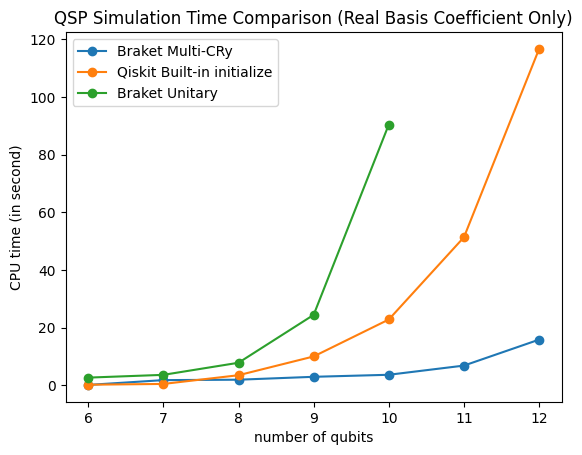

In [5]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
n = 12
x1 = range(6, n + 1)
x2 = range(6, n - 2 + 1)
ax.plot(x1, braket_time_arr_real, label='Braket Multi-CRy', marker='o')
ax.plot(x1, qiskit_time_arr_real, label='Qiskit Built-in initialize', marker='o')
ax.plot(x2, braket_unitary_time_arr_real, label='Braket Unitary', marker='o')
ax.set_xlabel('number of qubits')  # Add an x-label to the axes.
ax.set_ylabel('CPU time (in second)')  # Add a y-label to the axes.
ax.set_title("QSP Simulation Time Comparison (Real Basis Coefficient Only)")
ax.legend()  # Add a legend.

(Note that the Braket Unitary time for n = 11 and n = 12 is not report due to their longer time)

<span style="color:orange;"> Note: the actual CPU time for each data point will have slight variations. </span>

In [6]:
%%capture
braket_time_arr, qiskit_time_arr, braket_unitary_time_arr = generate_time_comparison_arrays(6, 12, mode = "complex")

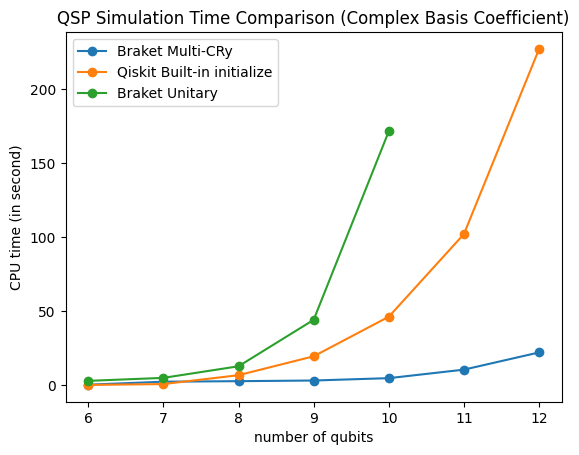

In [7]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
n = 12
x1 = range(6, n + 1)
x2 = range(6, n - 2 + 1)
ax.plot(x1, braket_time_arr, label='Braket Multi-CRy', marker='o')
ax.plot(x1, qiskit_time_arr, label='Qiskit Built-in initialize', marker='o')
ax.plot(x2, braket_unitary_time_arr, label='Braket Unitary', marker='o')
ax.set_xlabel('number of qubits')  # Add an x-label to the axes.
ax.set_ylabel('CPU time (in second)')  # Add a y-label to the axes.
ax.set_title("QSP Simulation Time Comparison (Complex Basis Coefficient)")
ax.legend()  # Add a legend.

(Note that the Braket Unitary time for n = 11 and n = 12 is not report due to their longer time)